<a href="https://colab.research.google.com/github/archisonal/Deep-Learning/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART - C

Question 7: Write a program to compare the performance of SGD, Adam, and RMSprop optimizers on a given dataset.

Prerequisites
*   Basic knowledge of machine learning and neural networks
*   Understanding of optimization algorithms (SGD, RMSprop, Adam)
*   Familiarity with NumPy and Pandas
*   Scikit-learn for data preprocessing

KEY POINTS
*   Uses a simple neural network with one hidden layer
*   Implements optimizers without using deep learning frameworks (Keras, PyTorch, TensorFlow)

*   Evaluates optimizer performance based on loss and accuracy


In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import load_iris

In [3]:
# Importing dataset
iris = load_iris()
X = iris.data #extract features
y = iris.target.reshape(-1, 1) #extract target

In [4]:
# Perform one-hot encoding
encode = OneHotEncoder(sparse_output = False)
y = encode.fit_transform(y)

# Normalize input features
scalar = StandardScaler()
X = scalar.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
# Initialize neural network parameters
input_size = X.shape[1]
hidden_size = 10
output_size = y.shape[1]
np.random.seed(42)

weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
bias_output = np.zeros((1, output_size))

In [6]:
# Activation and loss functions
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))

def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

In [8]:
# Optimizer functions
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    def update(self, w, dw):
        return w - self.lr * dw

class RMSprop:
    def __init__(self, lr=0.01, beta=0.9, epsilon=1e-8):
        self.lr = lr
        self.beta = beta
        self.epsilon = epsilon
        self.sq_grad = None
    def update(self, w, dw):
        if self.sq_grad is None:
            self.sq_grad = np.zeros_like(dw)
        self.sq_grad = self.beta * self.sq_grad + (1 - self.beta) * dw**2
        return w - (self.lr / (np.sqrt(self.sq_grad) + self.epsilon)) * dw

class Adam:
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0
    def update(self, w, dw):
        if self.m is None:
            self.m = np.zeros_like(dw)
            self.v = np.zeros_like(dw)
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * dw
        self.v = self.beta2 * self.v + (1 - self.beta2) * (dw ** 2)
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        return w - (self.lr * m_hat) / (np.sqrt(v_hat) + self.epsilon)

In [9]:
# Training function
def train(optimizer_class, epochs=500):
    np.random.seed(42)
    w1, b1, w2, b2 = weights_input_hidden.copy(), bias_hidden.copy(), weights_hidden_output.copy(), bias_output.copy()
    optimizer_w1, optimizer_b1 = optimizer_class(), optimizer_class()
    optimizer_w2, optimizer_b2 = optimizer_class(), optimizer_class()

    for epoch in range(epochs):
        # Forward pass
        hidden_layer = relu(np.dot(X_train, w1) + b1)
        output_layer = softmax(np.dot(hidden_layer, w2) + b2)
        loss = cross_entropy_loss(y_train, output_layer)

        # Backward pass
        output_error = output_layer - y_train
        hidden_error = np.dot(output_error, w2.T) * relu_derivative(hidden_layer)

        dw2 = np.dot(hidden_layer.T, output_error) / len(X_train)
        db2 = np.mean(output_error, axis=0, keepdims=True)
        dw1 = np.dot(X_train.T, hidden_error) / len(X_train)
        db1 = np.mean(hidden_error, axis=0, keepdims=True)

        # Update parameters
        w2 = optimizer_w2.update(w2, dw2)
        b2 = optimizer_b2.update(b2, db2)
        w1 = optimizer_w1.update(w1, dw1)
        b1 = optimizer_b1.update(b1, db1)

    # Evaluate accuracy
    hidden_layer = relu(np.dot(X_test, w1) + b1) # This line was incorrectly indented. Fixed by removing the extra indentation.
    output_layer = softmax(np.dot(hidden_layer, w2) + b2)
    acc = accuracy(y_test, output_layer)
    return loss, acc

In [10]:
# Run experiments
optimizers = {'SGD': SGD, 'RMSprop': RMSprop, 'Adam': Adam}
results = {}

for name, opt_class in optimizers.items():
    loss, acc = train(opt_class)
    results[name] = {'Final Loss': loss, 'Test Accuracy': acc}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


         Final Loss  Test Accuracy
SGD        1.034391       0.633333
RMSprop    0.043158       1.000000
Adam       0.047037       1.000000


PRECAUTIONS:


*   Ensure the dataset is correctly preprocessed (one-hot encoding and normalization)
*   Use appropriate hyperparameters for each optimizer
*   Avoid vanishing/exploding gradients by initializing weights properly



Question 8: Implement a neural network for binary classification and test different activation functions like ReLU, Sigmoid, and Tanh.

PREREQUISITES:

*   Basic Understanding of Python and Numpy
*   Knowledge of Neural Networks and Activation Functions
*   Familiarity with the Iris dataset

KEY TERMS:


*   Neural Network
*   Activation Functions (ReLU, Sigmoid, Tanh)
*   Backpropogation
*   Gradient Descent
*   Binary Classification

In [11]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.datasets import load_iris

In [12]:
# Load Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Select only two classes for binary classification
data = data[data['target'] != 2]
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [14]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert labels to binary format
y = y.reshape(-1, 1)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - x ** 2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

In [16]:
# Neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))
        self.set_activation_function(activation)
        self.loss_history = []

    def set_activation_function(self, activation):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_derivative = tanh_derivative
        elif activation == 'relu':
            self.activation = relu
            self.activation_derivative = relu_derivative
        else:
            raise ValueError("Invalid activation function")

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.activation(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)  # Output layer is always sigmoid for binary classification
        return self.final_output

    def backward(self, X, y, learning_rate):
        error = y - self.final_output
        output_gradient = error * sigmoid_derivative(self.final_output)
        hidden_error = output_gradient.dot(self.weights_hidden_output.T)
        hidden_gradient = hidden_error * self.activation_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(output_gradient) * learning_rate
        self.bias_output += np.sum(output_gradient, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_gradient) * learning_rate
        self.bias_hidden += np.sum(hidden_gradient, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs=1000, learning_rate=0.01): # Added the train method within the class definition
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)
            loss = np.mean(np.square(y - self.final_output))
            self.loss_history.append(loss)
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}')

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)


Training with sigmoid activation
Epoch 0, Loss: 0.1463
Epoch 100, Loss: 0.0102
Epoch 200, Loss: 0.0048
Epoch 300, Loss: 0.0031
Epoch 400, Loss: 0.0023
Epoch 500, Loss: 0.0018
Epoch 600, Loss: 0.0015
Epoch 700, Loss: 0.0012
Epoch 800, Loss: 0.0011
Epoch 900, Loss: 0.0009
Accuracy with sigmoid: 1.0000

Training with tanh activation
Epoch 0, Loss: 0.0946
Epoch 100, Loss: 0.0023
Epoch 200, Loss: 0.0012
Epoch 300, Loss: 0.0008
Epoch 400, Loss: 0.0006
Epoch 500, Loss: 0.0005
Epoch 600, Loss: 0.0004
Epoch 700, Loss: 0.0003
Epoch 800, Loss: 0.0003
Epoch 900, Loss: 0.0003
Accuracy with tanh: 1.0000

Training with relu activation
Epoch 0, Loss: 0.4413
Epoch 100, Loss: 0.0023
Epoch 200, Loss: 0.0010
Epoch 300, Loss: 0.0007
Epoch 400, Loss: 0.0005
Epoch 500, Loss: 0.0004
Epoch 600, Loss: 0.0003
Epoch 700, Loss: 0.0003
Epoch 800, Loss: 0.0002
Epoch 900, Loss: 0.0002
Accuracy with relu: 1.0000


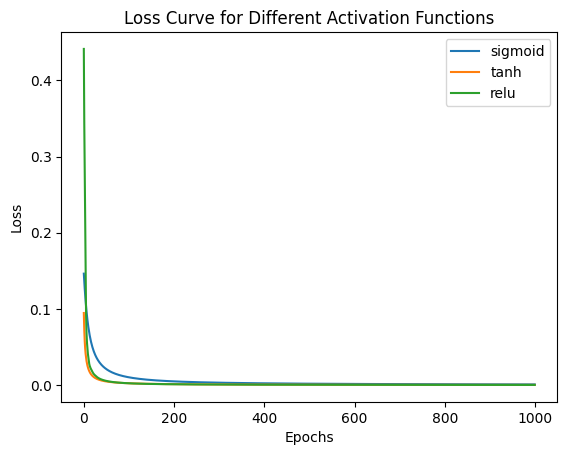

In [17]:
# Train and evaluate the model for different activation functions
for activation in ['sigmoid', 'tanh', 'relu']:
    print(f'\nTraining with {activation} activation')
    nn = NeuralNetwork(input_size=4, hidden_size=5, output_size=1, activation=activation)
    nn.train(X_train, y_train, epochs=1000, learning_rate=0.01)

    predictions = nn.predict(X_test)
    accuracy = np.mean(predictions == y_test)
    print(f'Accuracy with {activation}: {accuracy:.4f}')

    # Plot loss curve
    plt.plot(nn.loss_history, label=activation)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for Different Activation Functions')
plt.legend()
plt.show()

PRECAUTIONS:


*   Ensure proper data preprocessing (normalization, binary classification)
*   Handle numerical stability in activation functions (e.g., avoiding large exponential values in Sigmoid)
*   Select an appropriate learning rate to prevent overfitting or underfitting
*   Monitor loss convergence during training

Question 9: Implement a neural network to solve a multi-class classification problem and evaluate different weight initialization techniques.

PREREQUISITES:
*   Understanding of machine learning concepts, particularly neural networks.
*   Familiarity with NumPy, Pandas, and Matplotlib.
*   Basic knowledge of backpropagation and activation functions.

KEY POINTS:
*   Uses the Iris dataset for multi-class classification.
*   Implements forward propagation, ReLU/softmax activation functions, and backpropagation.
*   Initializes weights and biases manually.
*   Trains the model using gradient descent with categorical cross-entropy loss.
*   Evaluates model performance using a loss curve.


In [18]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import load_iris

In [19]:
# Load Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target.reshape(-1, 1)  # Labels
num_classes = len(np.unique(y))
num_features = X.shape[1]

# One-hot encode labels
ohe = OneHotEncoder(sparse_output=False)
y_encoded = ohe.fit_transform(y)

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Initialize weights and biases
def initialize_weights(layers):
    np.random.seed(42)
    weights = {}
    for i in range(len(layers) - 1):
        weights[f'W{i+1}'] = np.random.randn(layers[i], layers[i+1]) * 0.01
        weights[f'b{i+1}'] = np.zeros((1, layers[i+1]))
    return weights

In [22]:
# Activation functions
def relu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return expZ / np.sum(expZ, axis=1, keepdims=True)

In [23]:
# Forward propagation
def forward_propagation(X, weights, layers):
    activations = {'A0': X}
    for i in range(1, len(layers) - 1):
        Z = np.dot(activations[f'A{i-1}'], weights[f'W{i}']) + weights[f'b{i}']
        activations[f'A{i}'] = relu(Z)
    Z_final = np.dot(activations[f'A{len(layers)-2}'], weights[f'W{len(layers)-1}']) + weights[f'b{len(layers)-1}']
    activations[f'A{len(layers)-1}'] = softmax(Z_final)
    return activations

In [24]:
# Compute loss
def compute_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-9))

# Backpropagation
def backward_propagation(X, y, weights, activations, layers, learning_rate):
    grads = {}
    m = X.shape[0]
    dZ = activations[f'A{len(layers)-1}'] - y

    for i in reversed(range(1, len(layers))):
        grads[f'dW{i}'] = np.dot(activations[f'A{i-1}'].T, dZ) / m
        grads[f'db{i}'] = np.sum(dZ, axis=0, keepdims=True) / m
        if i > 1:
            dZ = np.dot(dZ, weights[f'W{i}'].T) * (activations[f'A{i-1}'] > 0)
        weights[f'W{i}'] -= learning_rate * grads[f'dW{i}']
        weights[f'b{i}'] -= learning_rate * grads[f'db{i}']
    return weights

In [25]:
# Train model
def train(X_train, y_train, layers, learning_rate=0.01, epochs=100):
    weights = initialize_weights(layers)
    loss_history = []
    for epoch in range(epochs):
        activations = forward_propagation(X_train, weights, layers)
        loss = compute_loss(y_train, activations[f'A{len(layers)-1}'])
        loss_history.append(loss)
        weights = backward_propagation(X_train, y_train, weights, activations, layers, learning_rate)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    return weights, loss_history

In [26]:
# Model architecture
layers = [num_features, 64, 64, num_classes]

# Train the model
weights, loss_history = train(X_train, y_train, layers, learning_rate=0.01, epochs=100)

Epoch 0, Loss: 0.3662037970520345
Epoch 10, Loss: 0.36619576389996605
Epoch 20, Loss: 0.366188678043615
Epoch 30, Loss: 0.36618238452293866
Epoch 40, Loss: 0.366176725655528
Epoch 50, Loss: 0.3661715731719634
Epoch 60, Loss: 0.3661669266196387
Epoch 70, Loss: 0.36616262405999
Epoch 80, Loss: 0.36615859150203595
Epoch 90, Loss: 0.3661547876972094


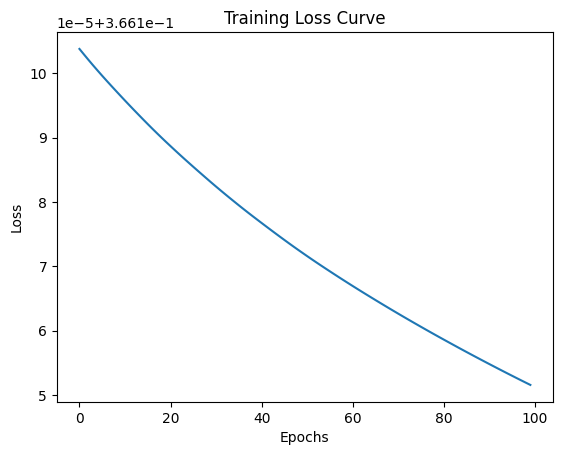

In [27]:
# Plot loss curve
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

PRECAUTIONS:


*   Ensure proper normalization of input features for better convergence.
*   Choose an appropriate learning rate to avoid slow convergence or overshooting.
*   Monitor loss during training to detect potential overfitting or underfitting.
*   Validate the model on a test set to assess generalization performance.





Question 10: Write a program to generate confusion matrices for different models and analyze their performance.

PREREQUISITES:
*   Basic understanding of machine learning concepts and classification problems.
*   Familiarity with Python, NumPy, and Pandas.
*   Knowledge of scikit-learn for classical machine learning models.

KEY POINTS:
*   Use the Iris dataset for classification tasks.
*   Implement Logistic Regression, K-Nearest Neighbors, and Decision Tree models.
*   Evaluate models using confusion matrices and classification reports.
*   Analyze performance without using deep learning frameworks like Keras, PyTorch, or TensorFlow.

In [28]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [29]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier()
}

In [32]:
# Train models, generate confusion matrices, and analyze performance
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Compute classification report
    report = classification_report(y_test, y_pred, target_names=iris.target_names)

    results[name] = {
        "Confusion Matrix": cm,
        "Classification Report": report
    }

In [33]:
# Display results (confusion matrix and classification report)
for name, result in results.items():
    print(f"Model: {name}")
    print("Confusion Matrix:")
    print(result["Confusion Matrix"])
    print("Classification Report:")
    print(result["Classification Report"])
    print("-" * 50)

Model: Logistic Regression
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------
Model: K-Nearest Neighbors
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.0

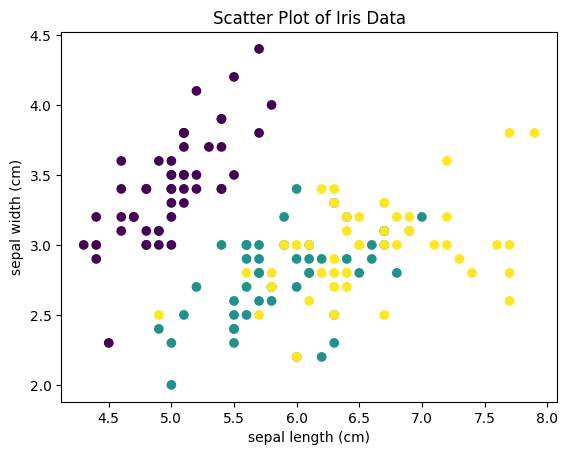

In [34]:
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the Iris dataset (again in this cell)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Assuming 'X' has at least two features (e.g., sepal length and sepal width)
plt.scatter(X[:, 0], X[:, 1], c=y)  # Color points by their class (y)
plt.xlabel(iris.feature_names[0])  # Label for x-axis
plt.ylabel(iris.feature_names[1])  # Label for y-axis
plt.title("Scatter Plot of Iris Data")  # Title of the plot
plt.show()  # Display the plot

PRECAUTIONS:
*   Ensure data is properly preprocessed and standardized before training models.
*   Use appropriate train-test splits to prevent overfitting.
*   Validate model performance using multiple metrics (not just accuracy).
*   Check for class imbalances that may affect classification results.